In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns
pd.set_option('display.max_columns', None)



In [ ]:
df = pd.read_csv('Sankeerth_Week1Task\data\StudentsPerformance.csv')
print(df.head())
print(df.info())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\HP\AppData\Local\Temp\ipykernel_2816\2098683673.py:1: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv('E:\EDULUMOS INTERSHIP TASKS\Task01_SmartStudyScorePredictor\data\StudentsPerformance.csv')


In [15]:
# Shape and basic info
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)

# Summary statistics
df.describe(include='all')


Shape of dataset: (1000, 9)

Data types:
 gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
average_score                  float64
dtype: object


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000,67.770667
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657,14.257326
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000,9.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000,58.333333
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000,68.333333
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000,77.666667


In [16]:
print("Missing values per column:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Missing values per column:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average_score                  0
dtype: int64

Duplicate rows: 0


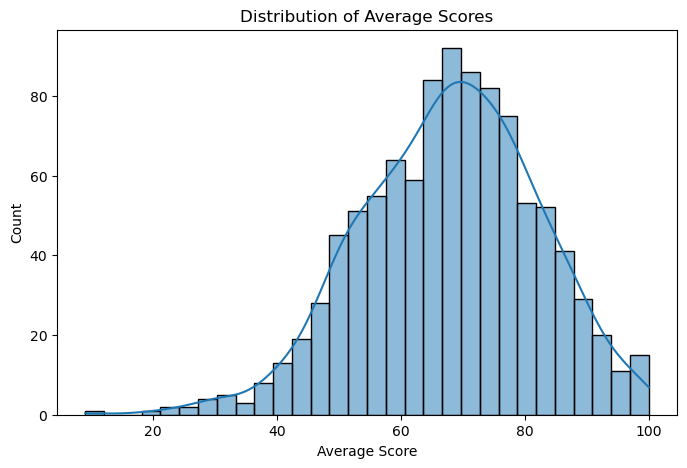

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['average_score'], bins=30, kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Count')
plt.show()


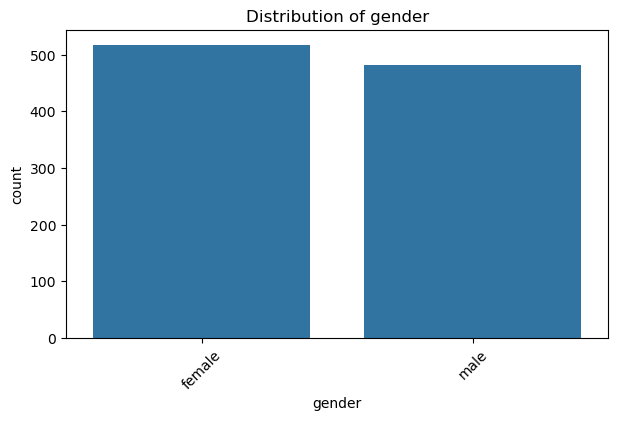

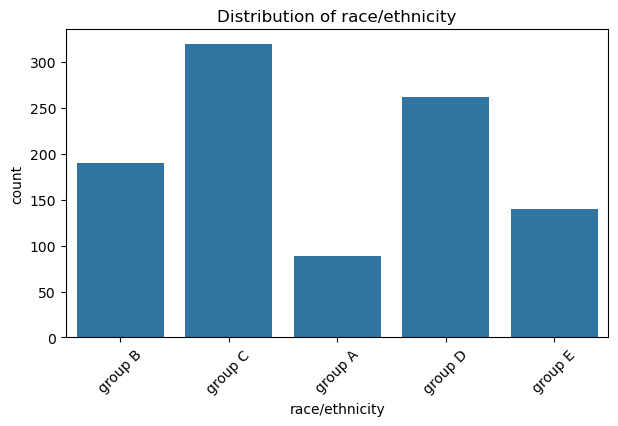

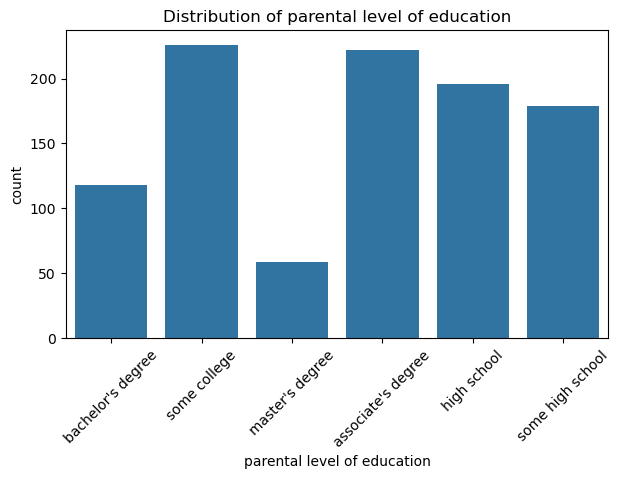

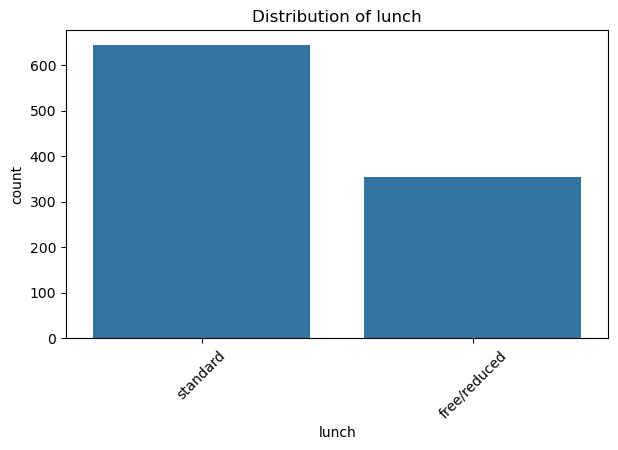

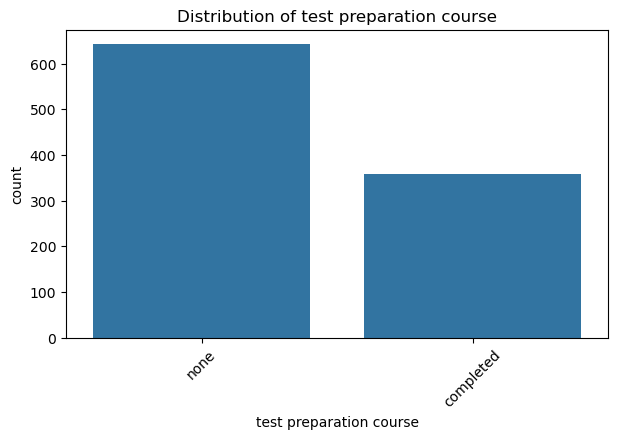

In [20]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


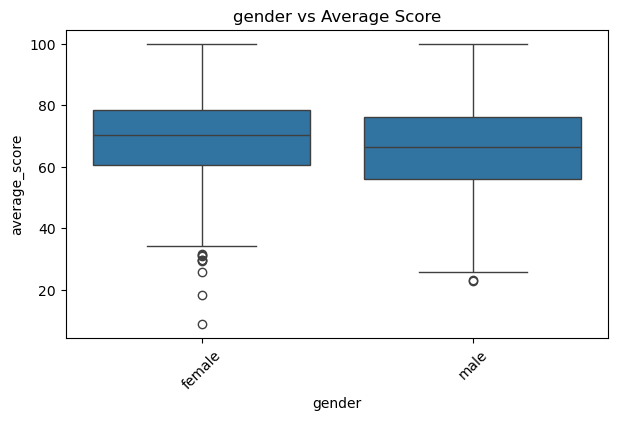

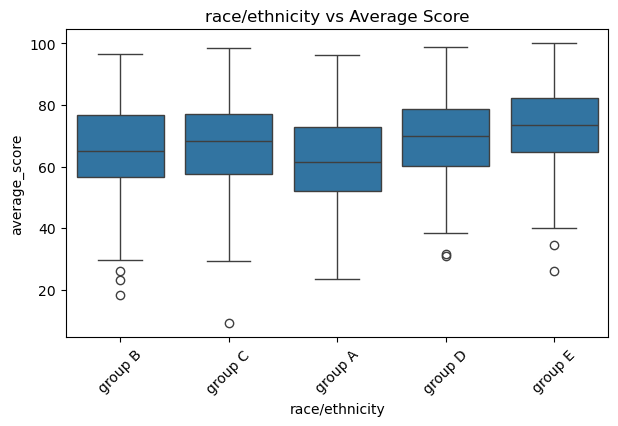

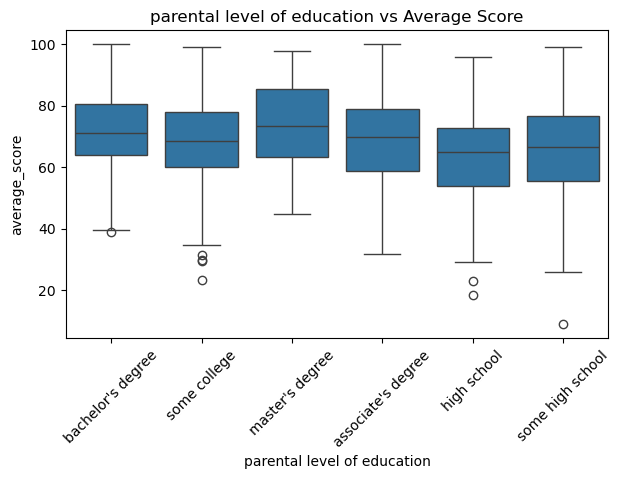

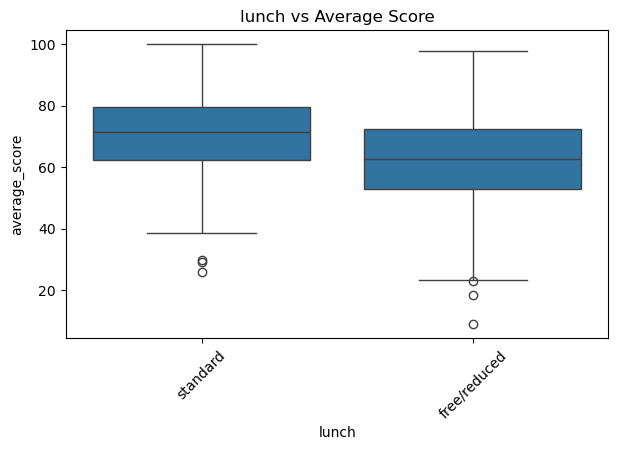

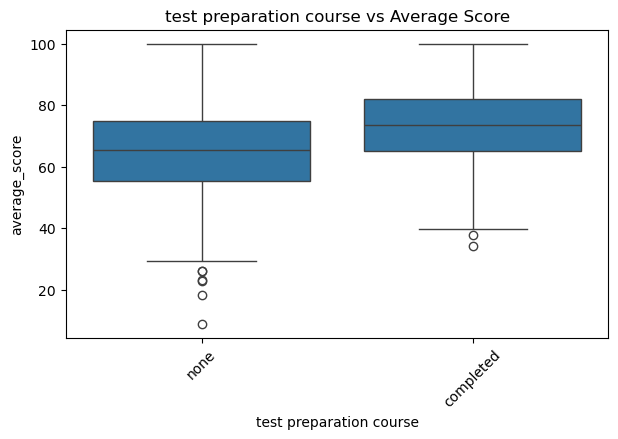

In [21]:
for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=col, y='average_score', data=df)
    plt.title(f'{col} vs Average Score')
    plt.xticks(rotation=45)
    plt.show()


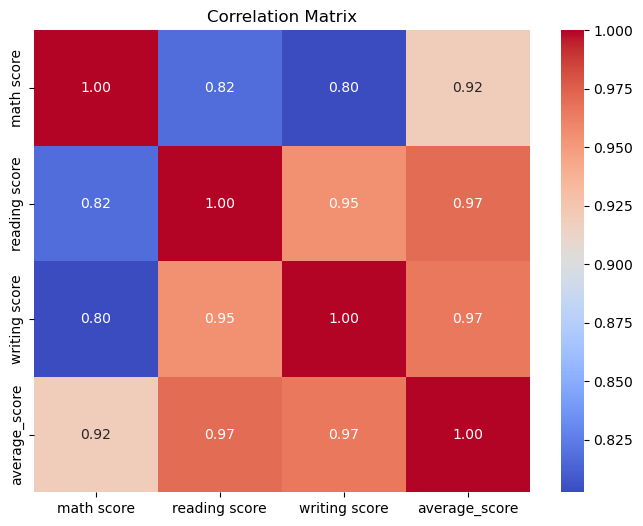

In [22]:
plt.figure(figsize=(8,6))
corr = df[['math score', 'reading score', 'writing score', 'average_score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [4]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,math score,reading score,writing score,average_score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,72.666667,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,82.333333,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,92.666667,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,49.333333,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,76.333333,True,False,True,False,False,False,False,False,True,False,True,True


In [ ]:
X = df_encoded.drop(['average_score', 'math score', 'reading score', 'writing score'], axis=1)
y = df_encoded['average_score']


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')


MAE: 10.49
RMSE: 13.40
R²: 0.16


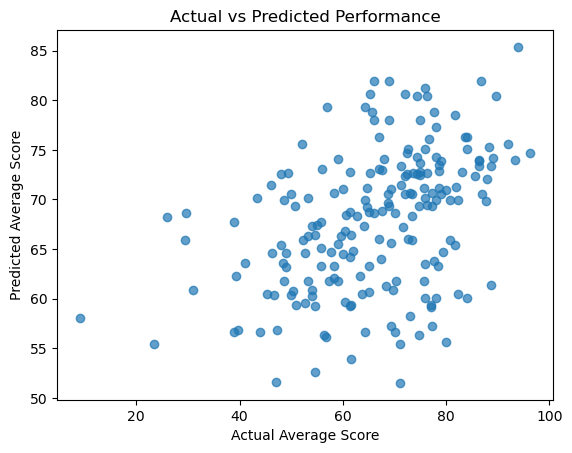

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Average Score')
plt.ylabel('Predicted Average Score')
plt.title('Actual vs Predicted Performance')
plt.show()


In [14]:
print(X.columns)


Index(['gender_male', 'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_standard',
       'test preparation course_none'],
      dtype='object')
